In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd ../TileEM/

/Users/dorislee/Desktop/Research/seg/crowd-seg/analysis/TileEM


In [3]:
from TileEM_plot_toolbox import *
from BB2TileExact import *

qualityBaseline.py:225: SyntaxWarning: import * only allowed at module level
  def compute_my_COCO_BBvals(compute_metrics=['simple','area','dist']):
qualityBaseline.py:341: SyntaxWarning: import * only allowed at module level
  def majority_vote(objid,heuristic="50%"):


In [105]:
def plot_coords(obj,color='red',reverse_xy=False,linewidth=2,linestyle='-',fill_color=""):
    #Plot shapely polygon coord 
    if type(obj)!=shapely.geometry.MultiPolygon:
        obj=[obj]
    for ob in obj: 
        if reverse_xy:
            x,y = ob.exterior.xy
        else:
            y,x = ob.exterior.xy
        plt.plot(x, y, linestyle, color=color,linewidth=linewidth, zorder=1)
        if fill_color!="": plt.fill_between(x, y , facecolor=fill_color,color='none', alpha=0.5)

In [106]:
def visualizeTilesSeparate(tiles,colorful=True,ymin=0,ymax=300):
    plt.figure()
    colors=cm.rainbow(np.linspace(0,1,len(tiles)))
    for t,i in zip(tiles,range(len(tiles))): 
        if colorful: 
            c = colors[i]
        else: 
            c="lime"
        if type(t)==shapely.geometry.polygon.Polygon:
            plot_coords(t,color=c,reverse_xy=True,fill_color=c,linewidth=1)
        elif type(t)==shapely.geometry.MultiPolygon or type(t)==shapely.geometry.collection:
            for region in t:
                if type(t)!=shapely.geometry.LineString:
                    plot_coords(region,color=c,reverse_xy=True,fill_color=c,linewidth=1)
    #xylocs of the largest tile for estimating the obj size
#     xlocs,ylocs = tiles[np.argmax([t.area for t in tiles])].exterior.coords.xy
#     plt.ylim(np.min(ylocs)-50,np.max(ylocs)+50)
#     plt.ylim(ymin,ymax)
    plt.axis("off")   
    plt.gca().invert_yaxis()
    plt.xlim(0,800)
    plt.savefig("tile.pdf")
    

In [97]:
def visualize_bb_objects(object_id,img_bkgrnd=True,worker_id=-1,gtypes=['worker','self'],single=False,bb_info="",title=True):
    '''
    Plot BB for the object corresponding to the given object_id
    #Still need to implement COCO later...
    gtypes: list specifying the types of BB to be plotted (worker=all worker's annotation, 'self'=self BBG)
    '''
    if not single:
        img_info,object_tbl,bb_info,hit_info=load_info()
    else:
        img_info,object_tbl,bb_info_bad,hit_info=load_info()
    plt.figure(figsize =(7,7))
    #ground_truth = pd.read_csv("../../data/object_ground_truth.csv")
    
    if img_bkgrnd:
        img_name = img_info[img_info.id==int(object_tbl[object_tbl.id==object_id]["image_id"])]["filename"].iloc[0]
        fname = "../../web-app/app/static/"+img_name+".png"
        img=mpimg.imread(fname)
        width,height = get_size(fname)
        img_id = int(img_name.split('_')[-1])
        plt.imshow(img)
        plt.xlim(0,width)
        plt.ylim(height,0)
        plt.axis("off")   
    else:
        plt.gca().invert_yaxis()
    if title: plt.title("Object {0} [{1}]".format(object_id,object_tbl[object_tbl.object_id==object_id]["name"].iloc[0]))
#         plt.fill_between(x_locs,y_locs,color='none',facecolor='#f442df', alpha=0.5)
    if 'worker' in gtypes:
        bb_objects = bb_info[bb_info["object_id"]==object_id]
        if worker_id!=-1:
            bb = bb_objects[bb_objects["worker_id"]==worker_id]
            xloc,yloc =  process_raw_locs([bb["x_locs"].iloc[0],bb["y_locs"].iloc[0]])    
        
            plt.plot(xloc,yloc,'-',color='cyan',linewidth=3)
            plt.fill_between(xloc,yloc,color='none',facecolor='#f442df', alpha=0.01)
        else:
            for x,y in zip(bb_objects["x_locs"],bb_objects["y_locs"]):
                xloc,yloc = process_raw_locs([x,y])
                if single:
                    plt.plot(xloc,yloc,'-',color='#f442df',linewidth=4)
                else:
                    plt.plot(xloc,yloc,'-',color='#f442df',linewidth=0.5)
                    plt.fill_between(xloc,yloc,color='none',facecolor='#f442df', alpha=0.01)
    if 'self' in gtypes:
        my_BBG  = pd.read_csv("my_ground_truth.csv")
        ground_truth_match = my_BBG[my_BBG.object_id==object_id]
        x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
        if single:
            plt.plot(x_locs,y_locs,'--',color='#0000ff',linewidth=2)
        else: 
            plt.plot(x_locs,y_locs,'-',color='#0000ff',linewidth=4)
    # elif gtype=='COCO':
    #     ground_truth_match = my_BBG[my_BBG.object_id==object_id]
    if not single:plt.savefig("bb_object_{}.pdf".format(object_id))

In [37]:
Nworker=25
batch_num=0
DATA_DIR = "sample/{0}worker_rand{1}/".format(Nworker,batch_num)

KeyboardInterrupt: 

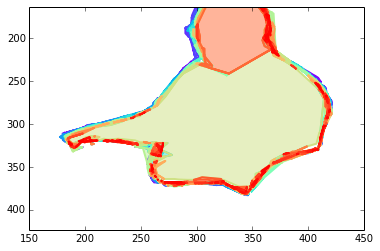

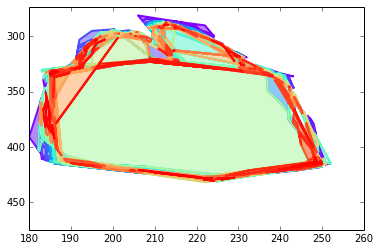

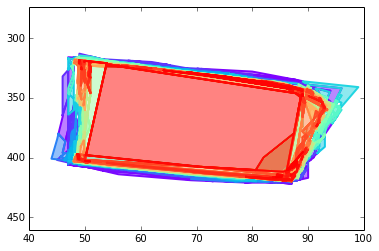

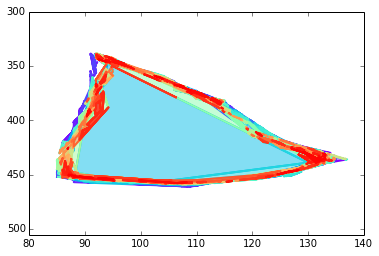

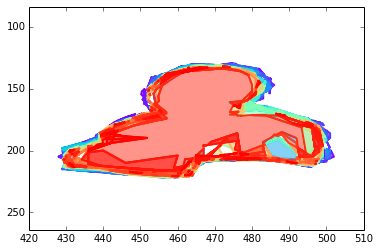

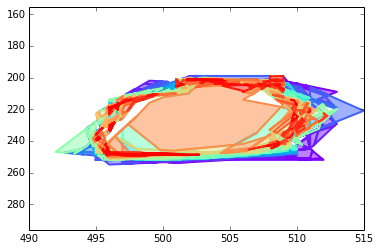

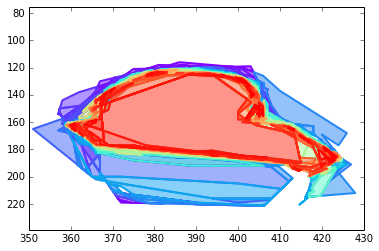

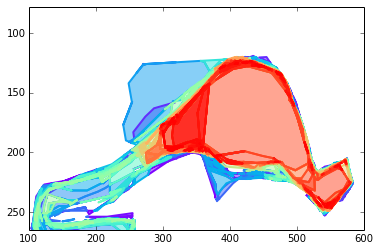

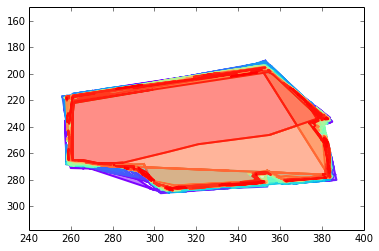

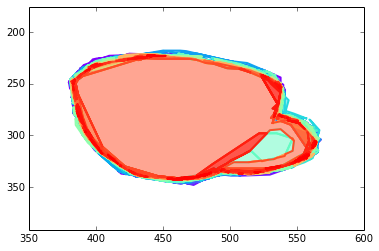

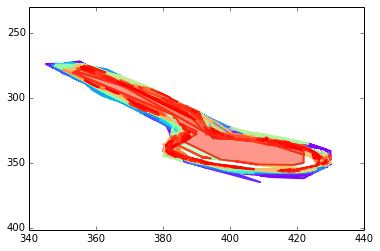

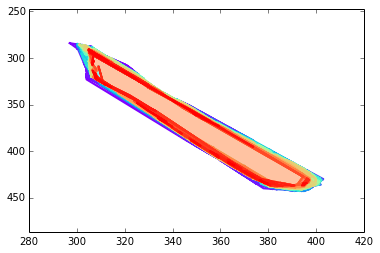

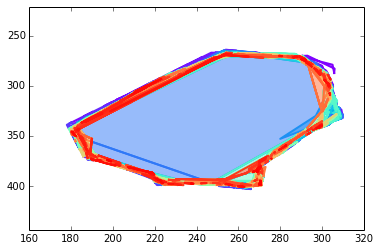

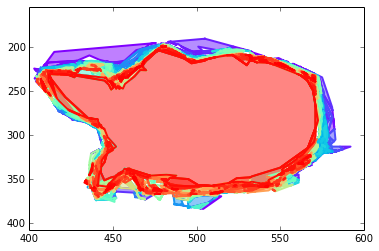

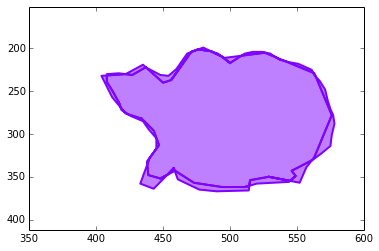

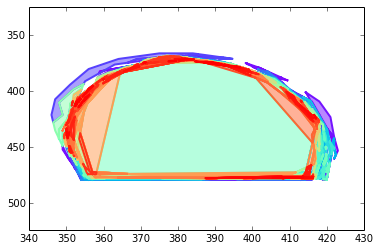

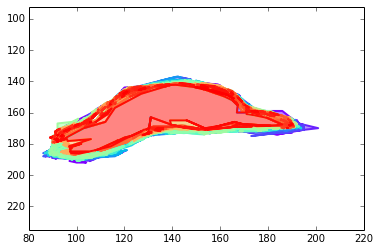

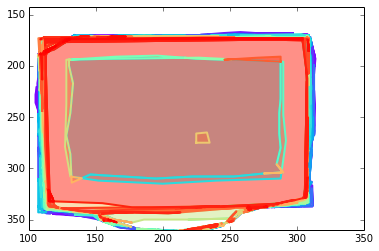

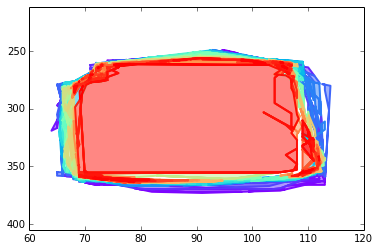

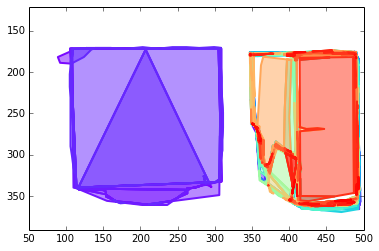

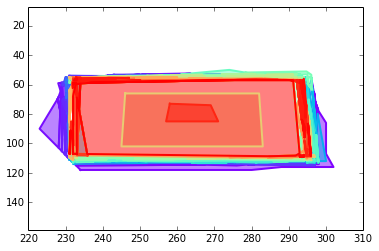

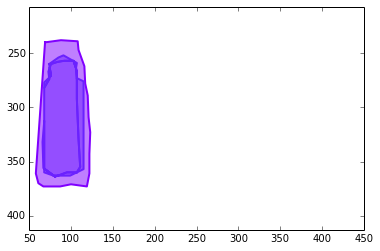

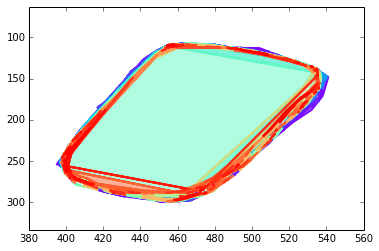

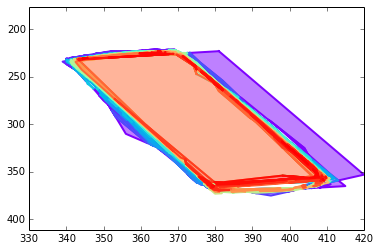

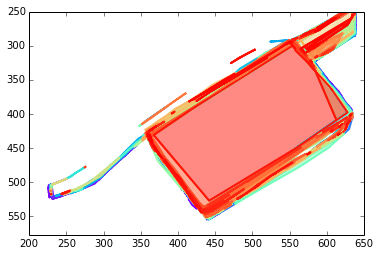

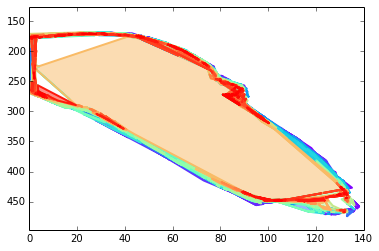

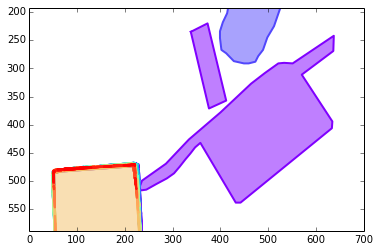

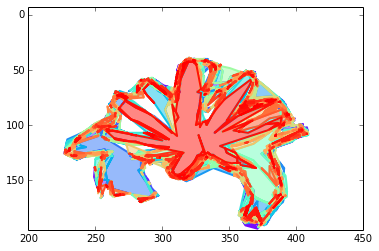

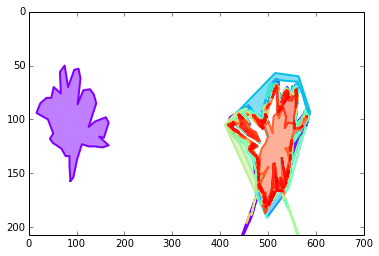

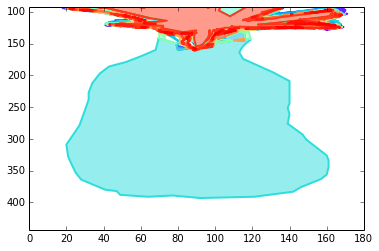

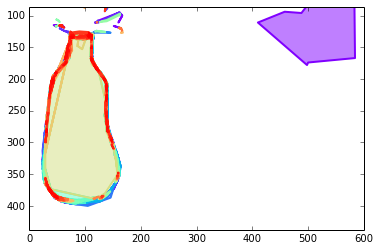

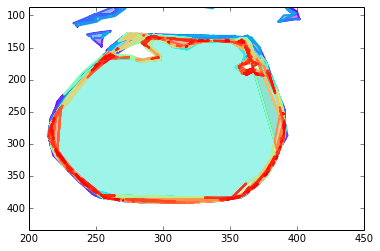

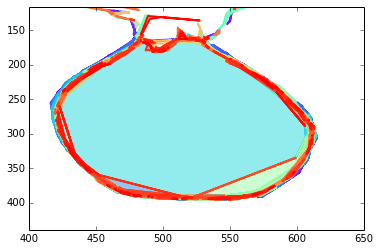

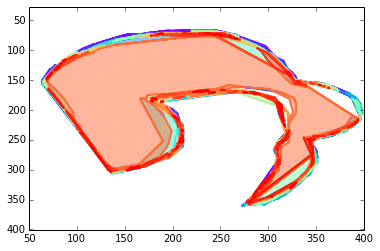

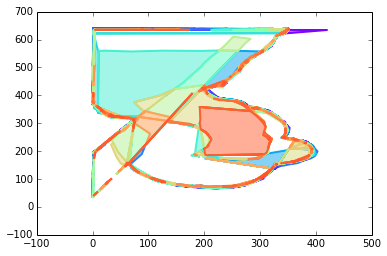

In [76]:
for objid in object_lst:
    tiles = pkl.load(open(DATA_DIR+"vtiles{}.pkl".format(objid)))
    visualizeTilesSeparate(tiles)

In [90]:
objid=30
DATA_DIR="final_all_tiles/"
tiles = pkl.load(open(DATA_DIR+"vtiles{}.pkl".format(objid)))
indMat = pkl.load(open(DATA_DIR+"indMat{}.pkl".format(objid)))
workers = pkl.load(open(DATA_DIR+"/worker{}.pkl".format(objid)))

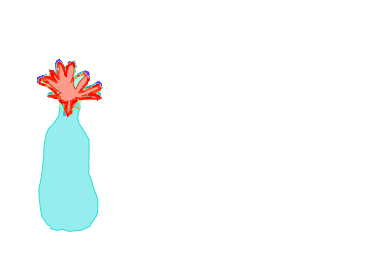

In [107]:
visualizeTilesSeparate(tiles)

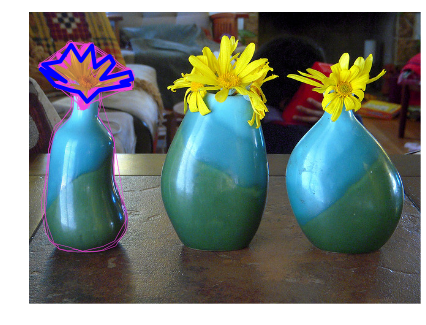

In [99]:
visualize_bb_objects(objid,title=False)

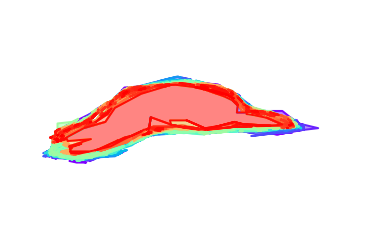

In [82]:
visualizeTilesSeparate(tiles)

In [95]:
#img_name = img_info[img_info.id==int(object_tbl[object_tbl.id==objid]["image_id"])]["filename"].iloc[0]
fname = "../../Image-Segmentation/Vision-stuff/color-segmented-images/COCO_train2014_000000543838.png"
img=mpimg.imread(fname)
width,height = get_size(fname)
img_id = int(img_name.split('_')[-1])
plt.imshow(img)
#plt.xlim(0,width)
#plt.ylim(height,0)
plt.axis("off")   

my_BBG  = pd.read_csv("my_ground_truth.csv")
ground_truth_match = my_BBG[my_BBG.object_id==object_id]
x_locs,y_locs =  process_raw_locs([ground_truth_match["x_locs"].iloc[0],ground_truth_match["y_locs"].iloc[0]])
plt.plot(x_locs,y_locs,'--',color='#0000ff',linewidth=2)


RuntimeError: _image_module::readpng: file not recognized as a PNG file